In [1]:
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Load the final model
model = tf.keras.models.load_model('models/cnn_data_aug_final_model.keras')


In [2]:
### Load, scale, and add a channel axis to test dataset (same preprocessing steps as train/val data) ###

# Load, scale, and add axis
_, (X_test_unscaled, y_test) = tf.keras.datasets.mnist.load_data()
X_test = (X_test_unscaled / 255).astype(np.float32)
X_test = X_test[..., np.newaxis]

# Print shape to confirm
print(f'{X_test.shape=}')

X_test.shape=(10000, 28, 28, 1)


In [3]:
### Evaluate the model on the test dataset ###

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Final Model - Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Model - Test Loss: {test_loss:.4f}")

# Hyperparameters:
# 'num_conv_layers': 3, # Excluding the subsampling layer of 5x5 stride 2
# 'num_filters_first_layer': 16,
# 'num_filters_sub_layers': 32,
# 'kernel_size': 5,
# 'subsample_type': '5x5stride2', # Instead of a size 2 pooling layer
# 'dense_layer_size': 256,
# 'activation': 'relu',
# 'dropout_rate': 0.2,
# 'learning_rate': 0.01


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0192
Final Model - Test Accuracy: 99.46%
Final Model - Test Loss: 0.0175


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


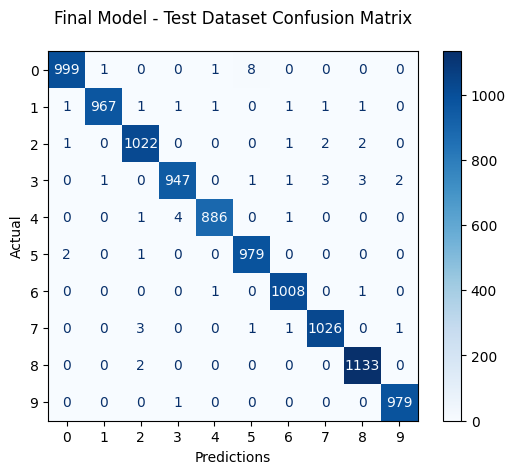

In [4]:
### Confusion Matrix ###

y_preds_prob = model.predict(X_test)
y_preds = np.argmax(y_preds_prob, axis=1)

# Compute and plot the confusion matrix using
cm = confusion_matrix(y_test, y_preds)
cm_swapped = cm[::-1, ::-1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_swapped)
disp.plot(cmap='Blues')

# Show plot
plt.title('Final Model - Test Dataset Confusion Matrix', pad=20)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

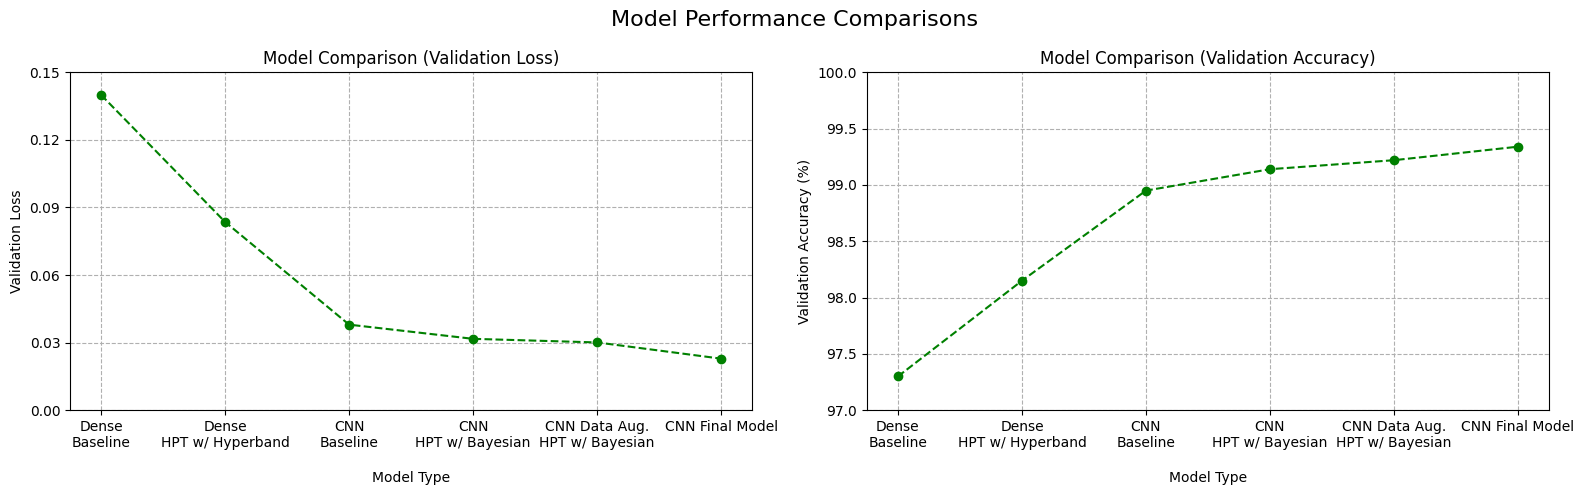

In [5]:
### Plot validation data for each technique/process's best model (taken from earlier notebooks) ###

model_performances = {
    'model_name': [
        'Dense\nBaseline',
        'Dense\nHPT w/ Hyperband',
        'CNN\nBaseline',
        'CNN\nHPT w/ Bayesian',
        'CNN Data Aug.\nHPT w/ Bayesian',
        'CNN Final Model'
    ],
    'val_accuracy': [97.30, 98.15, 98.95, 99.14, 99.22, 99.34],
    'val_loss': [.1400, 0.0836, 0.0380, 0.0317, 0.0301, 0.0229],
}

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Validation Loss
axes[0].plot(model_performances['model_name'], model_performances['val_loss'], marker='o', linestyle='--', color='green')
axes[0].set_title('Model Comparison (Validation Loss)')
axes[0].set_xlabel('Model Type', labelpad=15)
axes[0].set_ylabel('Validation Loss')
axes[0].set_ylim(0.0, 0.15)
axes[0].set_yticks([i/100 for i in range(0, 16, 3)])
axes[0].grid(True, axis='both', linestyle='--')

# Plot 2: Validation Accuracy
axes[1].plot(model_performances['model_name'], model_performances['val_accuracy'], marker='o', linestyle='--', color='green')
axes[1].set_title('Model Comparison (Validation Accuracy)')
axes[1].set_xlabel('Model Type', labelpad=15)
axes[1].set_ylabel('Validation Accuracy (%)')
axes[1].set_ylim(97, 100)
axes[1].set_yticks([97.0, 97.5, 98.0, 98.5, 99.0, 99.5, 100.0])
axes[1].grid(True, axis='both', linestyle='--')

fig.suptitle('Model Performance Comparisons', fontsize=16)
plt.tight_layout()
plt.show()